# **Tugas 2 - Pre-Processing Data dengan TF-IDF**

**Nama : Achmad Baharuddin Akbar**

**NIM  : 210411100001**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/tugas-ppw/data_berita_detik.csv")
df.head(6)

,judul,tanggal,isi,kategori
0,Jangan Sembarangan! Waspadai Pemicu Cedera saa...,"Sabtu, 07 Sep 2024 19:00 WIB",Jakarta - Olahraga lari dalam beberapa waktu t...,Kesehatan
1,Keseringan Pakai TWS? Waspada Gangguan Pendeng...,"Sabtu, 07 Sep 2024 18:00 WIB",Jakarta - Adanya teknologi earphone nirkabel a...,Kesehatan
2,Jogging Pakai TWS Aman Nggak Sih? Ini Plus-Min...,"Sabtu, 07 Sep 2024 17:00 WIB",Jakarta - Tren penggunaan earphone nirkabel at...,Kesehatan
3,5 Kebiasaan Simpel yang Bisa Bikin Panjang Umu...,"Sabtu, 07 Sep 2024 14:00 WIB",Jakarta - Hidup sehat dengan umur yang panjang...,Kesehatan
4,Rajin Sit-up Saja Nggak Bikin Lemak di Perut H...,"Sabtu, 07 Sep 2024 13:00 WIB",Jakarta - Spesialis kedokteran olahraga dr And...,Kesehatan
5,Waduh! Peneliti di China Temukan Virus Baru Ak...,"Sabtu, 07 Sep 2024 12:00 WIB",Jakarta - Ilmuwan menemukan virus baru di Chin...,Kesehatan


**CLEANING**


---



**Cleaning Data** adalah proses awal dalam pengolahan teks yang bertujuan untuk membersihkan data
teks dari elemen-elemen yang tidak diperlukan atau mengganggu, seperti :
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [6]:
import re
import string
import nltk

def remove_url(ulasan):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', ulasan)

def remove_html(ulasan):
  html = re.compile(r'<.#?>')
  return html.sub(r'', ulasan)

def remove_emoji(ulasan):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', ulasan)

def remove_numbers(ulasan):
  ulasan = re.sub(r'\d+', '', ulasan)
  return ulasan

def remove_symbols(ulasan):
  ulasan = re.sub(r'[^a-zA-Z0-9\s]', '', ulasan) #menghapus semua simbol
  return ulasan

df['cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,tanggal,isi,kategori,cleansing
0,Jangan Sembarangan! Waspadai Pemicu Cedera saa...,"Sabtu, 07 Sep 2024 19:00 WIB",Jakarta - Olahraga lari dalam beberapa waktu t...,Kesehatan,Jakarta Olahraga lari dalam beberapa waktu te...
1,Keseringan Pakai TWS? Waspada Gangguan Pendeng...,"Sabtu, 07 Sep 2024 18:00 WIB",Jakarta - Adanya teknologi earphone nirkabel a...,Kesehatan,Jakarta Adanya teknologi earphone nirkabel at...
2,Jogging Pakai TWS Aman Nggak Sih? Ini Plus-Min...,"Sabtu, 07 Sep 2024 17:00 WIB",Jakarta - Tren penggunaan earphone nirkabel at...,Kesehatan,Jakarta Tren penggunaan earphone nirkabel ata...
3,5 Kebiasaan Simpel yang Bisa Bikin Panjang Umu...,"Sabtu, 07 Sep 2024 14:00 WIB",Jakarta - Hidup sehat dengan umur yang panjang...,Kesehatan,Jakarta Hidup sehat dengan umur yang panjang ...
4,Rajin Sit-up Saja Nggak Bikin Lemak di Perut H...,"Sabtu, 07 Sep 2024 13:00 WIB",Jakarta - Spesialis kedokteran olahraga dr And...,Kesehatan,Jakarta Spesialis kedokteran olahraga dr Andh...
5,Waduh! Peneliti di China Temukan Virus Baru Ak...,"Sabtu, 07 Sep 2024 12:00 WIB",Jakarta - Ilmuwan menemukan virus baru di Chin...,Kesehatan,Jakarta Ilmuwan menemukan virus baru di China...


**CASE FOLDING**


---



**Casefolding** adalah langkah dalam preprocessing yang melibatkan
pengonversian semua karakter teks menjadi huruf kecil. Tujuan dari casefolding adalah
untuk menghilangkan ambiguitas yang dapat muncul karena perbedaan huruf besar
dan kecil. Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan
dianggap sebagai entitas yang berbeda. Dengan menerapkan casefolding, konsistensi
dalam representasi kata dapat dipertahankan.

In [7]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['case_folding'] = df['cleansing'].apply(case_folding)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding
0,Jangan Sembarangan! Waspadai Pemicu Cedera saa...,"Sabtu, 07 Sep 2024 19:00 WIB",Jakarta - Olahraga lari dalam beberapa waktu t...,Kesehatan,Jakarta Olahraga lari dalam beberapa waktu te...,jakarta olahraga lari dalam beberapa waktu te...
1,Keseringan Pakai TWS? Waspada Gangguan Pendeng...,"Sabtu, 07 Sep 2024 18:00 WIB",Jakarta - Adanya teknologi earphone nirkabel a...,Kesehatan,Jakarta Adanya teknologi earphone nirkabel at...,jakarta adanya teknologi earphone nirkabel at...
2,Jogging Pakai TWS Aman Nggak Sih? Ini Plus-Min...,"Sabtu, 07 Sep 2024 17:00 WIB",Jakarta - Tren penggunaan earphone nirkabel at...,Kesehatan,Jakarta Tren penggunaan earphone nirkabel ata...,jakarta tren penggunaan earphone nirkabel ata...
3,5 Kebiasaan Simpel yang Bisa Bikin Panjang Umu...,"Sabtu, 07 Sep 2024 14:00 WIB",Jakarta - Hidup sehat dengan umur yang panjang...,Kesehatan,Jakarta Hidup sehat dengan umur yang panjang ...,jakarta hidup sehat dengan umur yang panjang ...
4,Rajin Sit-up Saja Nggak Bikin Lemak di Perut H...,"Sabtu, 07 Sep 2024 13:00 WIB",Jakarta - Spesialis kedokteran olahraga dr And...,Kesehatan,Jakarta Spesialis kedokteran olahraga dr Andh...,jakarta spesialis kedokteran olahraga dr andh...
5,Waduh! Peneliti di China Temukan Virus Baru Ak...,"Sabtu, 07 Sep 2024 12:00 WIB",Jakarta - Ilmuwan menemukan virus baru di Chin...,Kesehatan,Jakarta Ilmuwan menemukan virus baru di China...,jakarta ilmuwan menemukan virus baru di china...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** memisahkan kata per kata dengan operator tokenize pada text
processing. Tujuannya untuk dikelompokkan kemunculan suatu kata pada proses
selanjutnya.Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [8]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize
0,Jangan Sembarangan! Waspadai Pemicu Cedera saa...,"Sabtu, 07 Sep 2024 19:00 WIB",Jakarta - Olahraga lari dalam beberapa waktu t...,Kesehatan,Jakarta Olahraga lari dalam beberapa waktu te...,jakarta olahraga lari dalam beberapa waktu te...,"[jakarta, olahraga, lari, dalam, beberapa, wak..."
1,Keseringan Pakai TWS? Waspada Gangguan Pendeng...,"Sabtu, 07 Sep 2024 18:00 WIB",Jakarta - Adanya teknologi earphone nirkabel a...,Kesehatan,Jakarta Adanya teknologi earphone nirkabel at...,jakarta adanya teknologi earphone nirkabel at...,"[jakarta, adanya, teknologi, earphone, nirkabe..."
2,Jogging Pakai TWS Aman Nggak Sih? Ini Plus-Min...,"Sabtu, 07 Sep 2024 17:00 WIB",Jakarta - Tren penggunaan earphone nirkabel at...,Kesehatan,Jakarta Tren penggunaan earphone nirkabel ata...,jakarta tren penggunaan earphone nirkabel ata...,"[jakarta, tren, penggunaan, earphone, nirkabel..."
3,5 Kebiasaan Simpel yang Bisa Bikin Panjang Umu...,"Sabtu, 07 Sep 2024 14:00 WIB",Jakarta - Hidup sehat dengan umur yang panjang...,Kesehatan,Jakarta Hidup sehat dengan umur yang panjang ...,jakarta hidup sehat dengan umur yang panjang ...,"[jakarta, hidup, sehat, dengan, umur, yang, pa..."
4,Rajin Sit-up Saja Nggak Bikin Lemak di Perut H...,"Sabtu, 07 Sep 2024 13:00 WIB",Jakarta - Spesialis kedokteran olahraga dr And...,Kesehatan,Jakarta Spesialis kedokteran olahraga dr Andh...,jakarta spesialis kedokteran olahraga dr andh...,"[jakarta, spesialis, kedokteran, olahraga, dr,..."
5,Waduh! Peneliti di China Temukan Virus Baru Ak...,"Sabtu, 07 Sep 2024 12:00 WIB",Jakarta - Ilmuwan menemukan virus baru di Chin...,Kesehatan,Jakarta Ilmuwan menemukan virus baru di China...,jakarta ilmuwan menemukan virus baru di china...,"[jakarta, ilmuwan, menemukan, virus, baru, di,..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yakni sebagai tahap pemilihan kata-kata yang
dianggap tidak penting atau kata yang tidak relevan.Untuk mengetahui kata mana yang
tidak relevan berdasarkan dari daftar stopword removal yang digunakan.

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [15]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,Filtering/stopword removal
0,Jangan Sembarangan! Waspadai Pemicu Cedera saa...,"Sabtu, 07 Sep 2024 19:00 WIB",Jakarta - Olahraga lari dalam beberapa waktu t...,Kesehatan,Jakarta Olahraga lari dalam beberapa waktu te...,jakarta olahraga lari dalam beberapa waktu te...,"[jakarta, olahraga, lari, dalam, beberapa, wak...",jakarta olahraga lari tren mudah berlari salah...
1,Keseringan Pakai TWS? Waspada Gangguan Pendeng...,"Sabtu, 07 Sep 2024 18:00 WIB",Jakarta - Adanya teknologi earphone nirkabel a...,Kesehatan,Jakarta Adanya teknologi earphone nirkabel at...,jakarta adanya teknologi earphone nirkabel at...,"[jakarta, adanya, teknologi, earphone, nirkabe...",jakarta teknologi earphone nirkabel true wirel...
2,Jogging Pakai TWS Aman Nggak Sih? Ini Plus-Min...,"Sabtu, 07 Sep 2024 17:00 WIB",Jakarta - Tren penggunaan earphone nirkabel at...,Kesehatan,Jakarta Tren penggunaan earphone nirkabel ata...,jakarta tren penggunaan earphone nirkabel ata...,"[jakarta, tren, penggunaan, earphone, nirkabel...",jakarta tren penggunaan earphone nirkabel true...
3,5 Kebiasaan Simpel yang Bisa Bikin Panjang Umu...,"Sabtu, 07 Sep 2024 14:00 WIB",Jakarta - Hidup sehat dengan umur yang panjang...,Kesehatan,Jakarta Hidup sehat dengan umur yang panjang ...,jakarta hidup sehat dengan umur yang panjang ...,"[jakarta, hidup, sehat, dengan, umur, yang, pa...",jakarta hidup sehat umur impian orang dibutuhk...
4,Rajin Sit-up Saja Nggak Bikin Lemak di Perut H...,"Sabtu, 07 Sep 2024 13:00 WIB",Jakarta - Spesialis kedokteran olahraga dr And...,Kesehatan,Jakarta Spesialis kedokteran olahraga dr Andh...,jakarta spesialis kedokteran olahraga dr andh...,"[jakarta, spesialis, kedokteran, olahraga, dr,...",jakarta spesialis kedokteran olahraga dr andhi...
5,Waduh! Peneliti di China Temukan Virus Baru Ak...,"Sabtu, 07 Sep 2024 12:00 WIB",Jakarta - Ilmuwan menemukan virus baru di Chin...,Kesehatan,Jakarta Ilmuwan menemukan virus baru di China...,jakarta ilmuwan menemukan virus baru di china...,"[jakarta, ilmuwan, menemukan, virus, baru, di,...",jakarta ilmuwan menemukan virus china ditulark...


In [16]:
df.to_csv("/content/drive/My Drive/PPW-A/report/tugas-ppw/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** mengonversi setiap dokumen teks menjadi vektor yang berisi
frekuensi kemunculan setiap kata dalam dokumen tersebut.Pembobotan TF-IDF
menghitung nilai bobot setiap kata untuk setiap dokumen. Ini dibagi menjadi dua proses
yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung jumlah kemunculan setiap kata dalam dokumen,
dan dengan kemunculan kata terbanyak, nilai kata tersebut adalah yang terbesar.

**IDF (Inverse Document Frequency)** menghitung jumlah dokumen untuk setiap kata yang
jarang muncul dalam dokumen yang dianggap memiliki nilai terbesar. Jika kata tersebut
memiliki banyak kemunculan kata dalam dokumen, hasilnya akan memiliki nilai yang
kecil.

In [17]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/tugas-ppw/hasil_preprocesing.csv", sep=",")

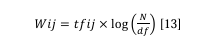

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Filtering/stopword removal'])

In [19]:
# Mengubah hasilnya menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,aa,abad,abah,abang,abc,abdul,abidin,absen,ac,academic,...,yu,yuk,yuwono,zainoel,zaitun,zat,zi,zika,zokor,zurich
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.054233,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.063819,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.0,0.0,0.129041,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.134307,0.0,0.0,0.000000,0.0
